## Задача 1:

Найдите хотя бы один корень уравнения $a x^2 + bx + c = 0$ методом градиентного спуска, если заведомо известно, что один действительный корень у него есть. Считайте, что a > 0.

In [1]:
from random import randint
"""
Напишите функцию, которая по a, b, c будет возвращать
один из корней этого уравнения (искать будет методом градиентного спуска)
"""
steps = []

def primitive(a, b, c, x_0):
  return ((a / 3) * (x_0 ** 3)) + ((b / 2) * (x_0 ** 2)) + c * x_0

def square(a, b, c, x_0):
  return a * (x_0 ** 2) + b * x_0 + c

def grad_descend(a, b, c):
  eps = 1e-9
  x_i = randint(-10, 10)
  alpha = 0.01
  x_next = x_i - alpha * square(a, b, c, x_i)

  while abs(primitive(a, b, c, x_i) - primitive(a, b, c, x_next)) > eps:
    grad = square(a, b, c, x_i)
    x_i = x_next
    x_next -= alpha * grad
    steps.append(x_i)

  return x_i

In [2]:
a, b = 1, -14
c = -120

x_0 = grad_descend(a, b, c)

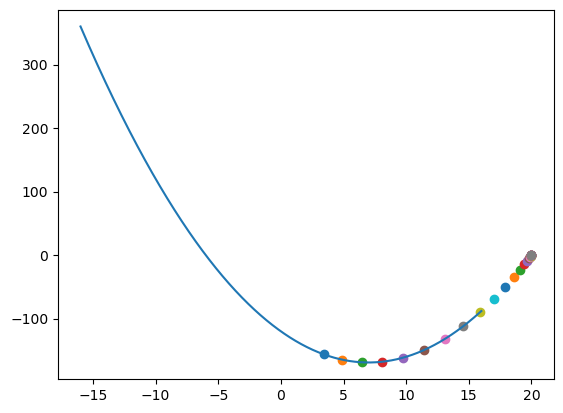

20


In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-16, 16, 1000)
y = [square(a,b,c, x_0) for x_0 in x]

plt.plot(x, y)

X = steps
y = [square(a,b,c, x_0) for x_0 in X]

for x_0 in X:
  plt.scatter(x_0, square(a,b,c, x_0))

plt.show()
print(round(grad_descend(1, -14, -120)))

## Задача 2:

Обучим логистическую регрессию с использованием правила Chain Rule и вычислительных графов.

Если чуть подробнее, то каждый класс - это узел в вычислительном графе, который должен уметь подсчитывать как значение по своим входам, там и градиент выхода по входу.

Иногда полезно запоминать подсчитанное значение в поле класса для более красивого и быстрого подсчета градиента (классический пример: это сигмоидальная функция, попробуйте её реализовать с "памятью" подсчитанного значения)

In [4]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
rng = np.random.default_rng(42)

Напишите класс линейной функции.

In [6]:
class LinearFunction:
  def __init__(self, n_features):
    """ Класс линейной функции """
    self.n_features = n_features
    self.w = np.zeros(self.n_features)

  def __call__(self, x_i):
    """ На вход ожидается x - один объект одномерные np.array """

    ''' Ваш код тут '''
    return np.dot(self.w, x_i)

  def grad(self, x_i):
    
    ''' Ваш код тут '''
    return x_i

  def grad_descent_step(self, grad_vals, lr):
    """ Шаг градиентного спуска, где grad_vals - np.array с соответствующими значениями градиентов """

    ''' Ваш код тут '''
    self.w -= lr * grad_vals

Напишите класс сигмоидальной функции.

*Замечание:* удобно запомнить подсчитанное значение сигмоиды в поле класса, тогда градиент будет красивый:)

In [7]:
class SigmoidActivation:
  def __call__(self, x_i):
    """ Подсчет значения функции, если x - число """

    '''Ваш код тут'''
    x_i = max(-100, x_i)
    x_i = min(100, x_i)
    
    self.value = 1 / (1 + np.exp(-x_i))
    return self.value

  def grad(self, x_i):
    """ Подсчет градиента функции, если x - число """

    '''Ваш код тут'''
    val = self.value
    if val is None:
      val = self(x_i)

    self.value = None
    return val * (1 - val)

Напишите класс для бинарной кросс-энтропии.

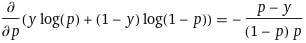

In [8]:
class BinaryCrossEntropyLoss:
  def __call__(self, y_pred, y_true):
    """ Подсчет функции потерь y_pred, y_true - числа"""

    '''Ваш код тут'''
    return -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

  def grad(self, y_pred, y_true):
    """ Подсчет градиента по y_pred; также y_pred, y_true - числа """

    '''Ваш код тут'''

    return (y_pred - y_true) / (((1 - y_pred) * y_pred) + 1e-9)

  def call_y_list(self, y_pred, y_true):
    """ Подсчет значения функции потерь, если y_pred, y_true - np.array одномерные """

    '''Ваш код тут'''

    l = 0
    for i in range(len(y_pred)):
      l += self(y_pred[i], y_true[i])
    return np.mean(l)

Напишите класс логистической регрессии.

*Замечание:* SGD - стохастический градиентный спуск (batch_size = 1)

In [9]:
def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    perm = rng.permutation(len(X))

    indices = []
    for ind in perm:
        indices.append(ind)
        if len(indices) == batch_size:
            yield np.take(X, indices, axis=0), np.take(y, indices)
            indices.clear()

In [10]:
class LogisticRegression:
  def __init__(self, n_features):
    self.n_features = n_features
    self.linear_layer = LinearFunction(self.n_features)
    self.sigmoid_layer = SigmoidActivation()
    self.bce = BinaryCrossEntropyLoss()

  def __call__(self, x_i):
    """ Подсчет выхода лог регрессии, x - одномерный np.array """

    '''Ваш код тут'''
    lin_outp = self.linear_layer(x_i)
    assert (np.array(lin_outp).shape == tuple()),  "Выход линейного слоя должен быть скаляром!"
    sigm_outp = self.sigmoid_layer(lin_outp)

    return sigm_outp


  def call_x_list(self, x_list):
    """ Подсчет выхода лог регрессии, x - двумерный np.array """

    '''Ваш код тут'''
    probas = []
    for x_i in x_list:
      probas.append(self(x_i))

    return probas

  def grad(self, x_i):
    """ Подсчет градиента выхода лог регрессии по x, где x - np.array """

    '''Ваш код тут'''
    grad_lin = self.linear_layer.grad(x_i)
    grad_sigm = self.sigmoid_layer.grad(self.linear_layer(x_i))

    return grad_sigm * grad_lin

  def fit(self, x_train, y_train, x_valid, y_valid, n_epochs, lr):
    """ Обучите лог регрессию методом SGD, используя ChainRule для подсчета градиента.
    SGD = шаг оптимизации нужно делать на каждом объекте выборки, а не на наборе"""

    '''Ваш код тут'''
    #losses = []
    batch_size = 1

    for i in tqdm(range(n_epochs)):
      for x_batch, y_batch in generate_batches(x_train, y_train, batch_size):
        predictions = self.call_x_list(x_batch)
        self.grad_descent_step(x_batch[0], predictions[0], y_batch[0], lr)

      predictions = self.call_x_list(x_valid)
      loss = self.bce.call_y_list(predictions, y_valid)
      assert (np.array(loss).shape == tuple()), "Лосс должен быть скаляром!"
      print(f'Loss на {i} итерации : {loss}')

  
  def grad_descent_step(self, x_i, prob_pred, y_true, lr):
    """ Реализуйте шаг градиентного спуска """

    '''Ваш код тут'''
    grad_loss = self.bce.grad(prob_pred, y_true)
    grad_linear = self.grad(x_i)
    grad_vals = grad_loss * grad_linear
    self.linear_layer.grad_descent_step(grad_vals, lr)


  def predict(self, x_i):
    """ Подсчет выхода лог регрессии, x - одномерный np.array """
    return self(x_i)

##Обработка данных

Возьмем датасет титаник, разделим на признаки и таргет. Возьмем в данных 4 численных признака. Разделим на трейн и на валидацию.

*Важно:* сделайте так, чтобы признаки у вас были представлены в виде 2-х мерного np.array, а таргеты были представлены в виде одномерного np.array

In [11]:
# !wget https://raw.githubusercontent.com/Aalfaa/temporary/main/train.csv

In [12]:
df = pd.read_csv('train.csv')

In [13]:
TEST_SIZE = 0.1
TARGET_COLUMN = 'Survived'
FEATURES_COLUMNS_LIST = ['Pclass', 'Age', 'Parch', 'SibSp', 'Fare']
N_EPOCHS = 30
LR = 0.01

In [14]:
y = df[TARGET_COLUMN].values
X = df[FEATURES_COLUMNS_LIST].fillna(0).values
X = np.hstack([X, np.ones((X.shape[0], 1))])

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [15]:
log_reg = LogisticRegression(X.shape[1])
log_reg.fit(x_train, y_train, x_valid, y_valid, n_epochs=N_EPOCHS, lr=LR)

 67%|██████▋   | 20/30 [00:00<00:00, 96.03it/s]

Loss на 0 итерации : 401.55961277301856
Loss на 1 итерации : 745.1677756737208
Loss на 2 итерации : 722.5479142527171
Loss на 3 итерации : 745.338484856584
Loss на 4 итерации : 691.7865546101986
Loss на 5 итерации : 524.9031175207233
Loss на 6 итерации : 221.6423122475565
Loss на 7 итерации : 678.1659564640416
Loss на 8 итерации : 353.2474115511938
Loss на 9 итерации : 307.9582629808957
Loss на 10 итерации : 224.36554284219278
Loss на 11 итерации : 276.1332523393428
Loss на 12 итерации : 256.7340363629783
Loss на 13 итерации : 745.6783507147179
Loss на 14 итерации : 714.8106571438136
Loss на 15 итерации : 286.18674267488325
Loss на 16 итерации : 612.2403496161915
Loss на 17 итерации : 314.55670092724625
Loss на 18 итерации : 375.69040861231304
Loss на 19 итерации : 706.4819763624878


100%|██████████| 30/30 [00:00<00:00, 94.70it/s]

Loss на 20 итерации : 533.3810421048494
Loss на 21 итерации : 310.07462111810287
Loss на 22 итерации : 474.63214867710644
Loss на 23 итерации : 625.0505474906444
Loss на 24 итерации : 454.86802833590883
Loss на 25 итерации : 643.5001801895841
Loss на 26 итерации : 404.23149656083353
Loss на 27 итерации : 348.0654595887655
Loss на 28 итерации : 224.95568904699272
Loss на 29 итерации : 314.8121653821956


In [16]:
from sklearn.metrics import roc_auc_score

y_pred = log_reg.call_x_list(x_valid)
roc_auc_score(y_true=y_valid, y_score=y_pred)

0.7592592592592592